In [1]:
# dataframe opertations - pandas
import pandas as pd
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

C:\Users\vinus\AppData\Local\Temp\ipykernel_14484\2031078931.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  airline = pd.read_excel('ProductDemand.xlsx', index_col='DayNumber', parse_dates=True)


(29, 4)
       demand_CL_m  CL_1000  demand_AD_m  AD_1000
month                                            
1         0.001744    1.744     0.000502    0.502
2         0.001620    1.620     0.000588    0.588
3         0.001357    1.357     0.000513    0.513
4         0.001135    1.135     0.000354    0.354
5         0.001161    1.161     0.000477    0.477


C:\Users\vinus\AppData\Local\Temp\ipykernel_14484\2699593494.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  airline = pd.read_excel('demand_month.xlsx',index_col='month', parse_dates=True)


<Axes: title={'center': 'Passengers Data'}, xlabel='month'>

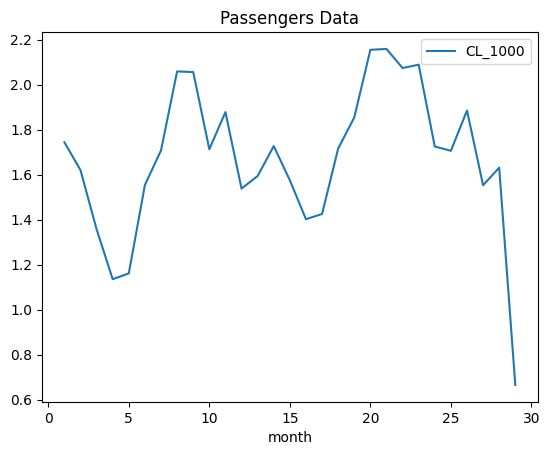

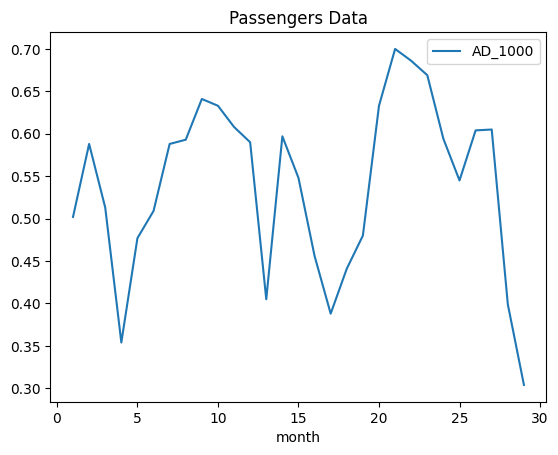

In [4]:
airline = pd.read_excel('demand_month.xlsx',index_col='month', parse_dates=True)
# finding shape of the dataframe
print(airline.shape)
# having a look at the data
print(airline.head())
# plotting the original data
airline[['CL_1000']].plot(title='Passengers Data')
airline[['AD_1000']].plot(title='Passengers Data')

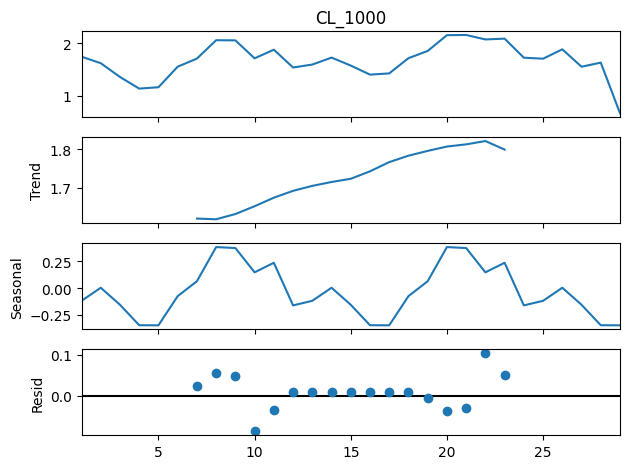

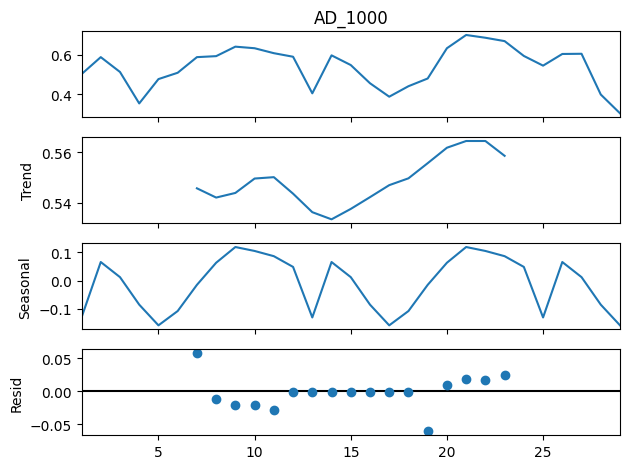

In [5]:
decompose_result = seasonal_decompose(airline['CL_1000'],model='additive',period=12)
decompose_result.plot();
decompose_result = seasonal_decompose(airline['AD_1000'],model='additive',period=12)
decompose_result.plot();

In [7]:
# Set the frequency of the date time index as Monthly start as indicated by the data
airline.index.freq = 'month'
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)
print(alpha)

0.041666666666666664


c:\Anacondainstalledhere\envs\Ai\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Axes: title={'center': 'Holt Winters Single Exponential Smoothing'}, xlabel='month'>

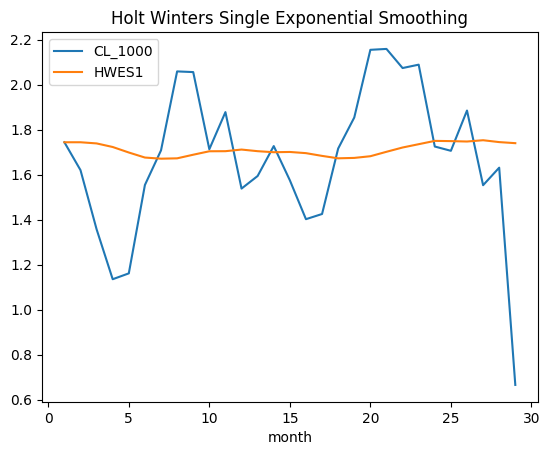

In [8]:
airline['HWES1'] = SimpleExpSmoothing(airline['CL_1000']).fit(
    smoothing_level=alpha, optimized=False, use_brute=True).fittedvalues
airline[['CL_1000', 'HWES1']].plot(title='Holt Winters Single Exponential Smoothing')

c:\Anacondainstalledhere\envs\Ai\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Anacondainstalledhere\envs\Ai\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


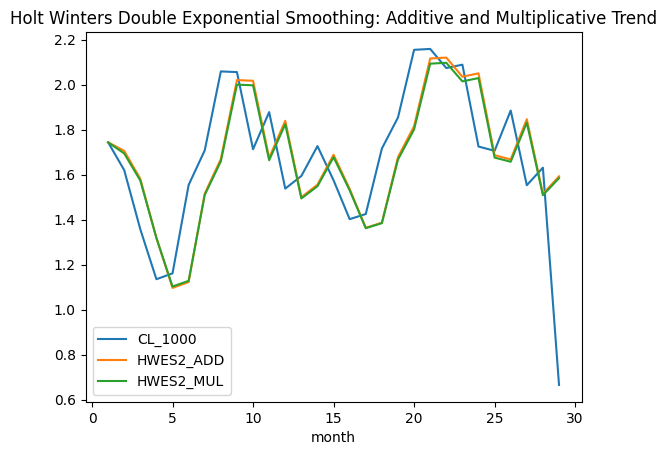

c:\Anacondainstalledhere\envs\Ai\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Anacondainstalledhere\envs\Ai\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


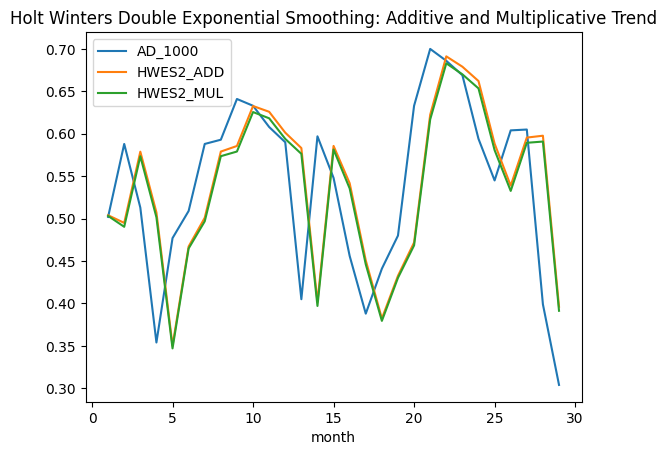

In [9]:
# Apply Holt-Winters Double Exponential Smoothing with Additive and Multiplicative Trend
airline['HWES2_ADD'] = ExponentialSmoothing(airline['CL_1000'], trend='add').fit().fittedvalues
airline['HWES2_MUL'] = ExponentialSmoothing(airline['CL_1000'], trend='mul').fit().fittedvalues

# Plot the results
airline[['CL_1000', 'HWES2_ADD', 'HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend')
plt.show()
# Apply Holt-Winters Double Exponential Smoothing with Additive and Multiplicative Trend
airline['HWES2_ADD'] = ExponentialSmoothing(airline['AD_1000'], trend='add').fit().fittedvalues
airline['HWES2_MUL'] = ExponentialSmoothing(airline['AD_1000'], trend='mul').fit().fittedvalues

# Plot the results
airline[['AD_1000', 'HWES2_ADD', 'HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend')
plt.show()

c:\Anacondainstalledhere\envs\Ai\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Anacondainstalledhere\envs\Ai\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


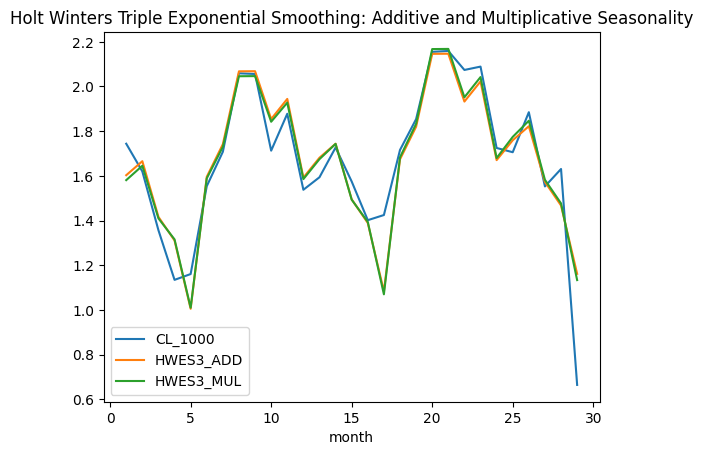

c:\Anacondainstalledhere\envs\Ai\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Anacondainstalledhere\envs\Ai\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


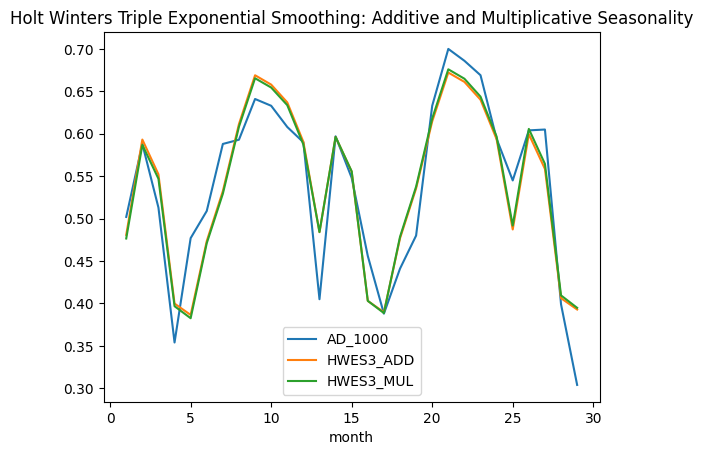

In [10]:
# Apply Holt-Winters Triple Exponential Smoothing with Additive and Multiplicative Seasonality
airline['HWES3_ADD'] = ExponentialSmoothing(
    airline['CL_1000'],
    trend='add',
    seasonal='add',
    seasonal_periods=12
).fit().fittedvalues

airline['HWES3_MUL'] = ExponentialSmoothing(
    airline['CL_1000'],
    trend='mul',
    seasonal='mul',
    seasonal_periods=12
).fit().fittedvalues

# Plot the results
airline[['CL_1000', 'HWES3_ADD', 'HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality')
plt.show()
# Apply Holt-Winters Triple Exponential Smoothing with Additive and Multiplicative Seasonality
airline['HWES3_ADD'] = ExponentialSmoothing(
    airline['AD_1000'],
    trend='add',
    seasonal='add',
    seasonal_periods=12
).fit().fittedvalues

airline['HWES3_MUL'] = ExponentialSmoothing(
    airline['AD_1000'],
    trend='mul',
    seasonal='mul',
    seasonal_periods=12
).fit().fittedvalues

# Plot the results
airline[['AD_1000', 'HWES3_ADD', 'HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality')
plt.show()

In [18]:
forecast_data = pd.read_excel('demand_month.xlsx',index_col='month',
parse_dates=True)

forecast_data.index.freq = 'month'

# Split into train and test set
train_airline = forecast_data[:25]
test_airline = forecast_data[25:]

C:\Users\vinus\AppData\Local\Temp\ipykernel_14484\2602999223.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  forecast_data = pd.read_excel('demand_month.xlsx',index_col='month',


c:\Anacondainstalledhere\envs\Ai\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Anacondainstalledhere\envs\Ai\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Anacondainstalledhere\envs\Ai\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


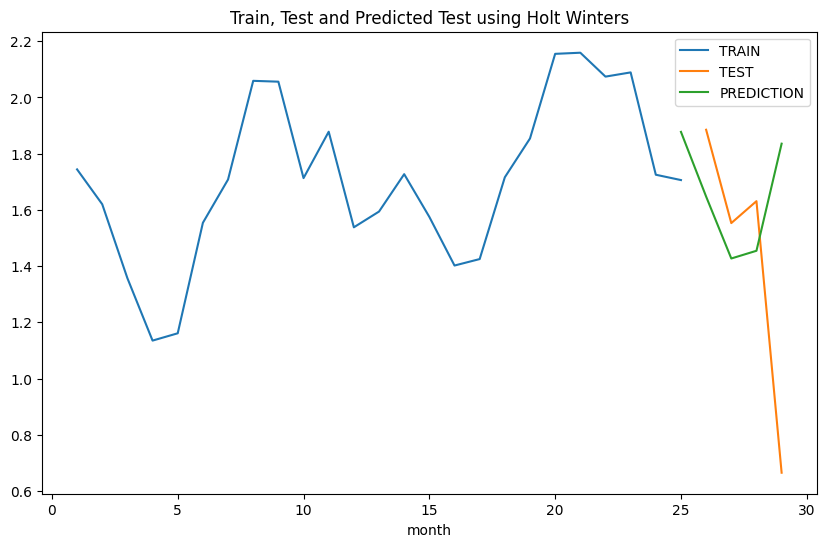

c:\Anacondainstalledhere\envs\Ai\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Anacondainstalledhere\envs\Ai\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Anacondainstalledhere\envs\Ai\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


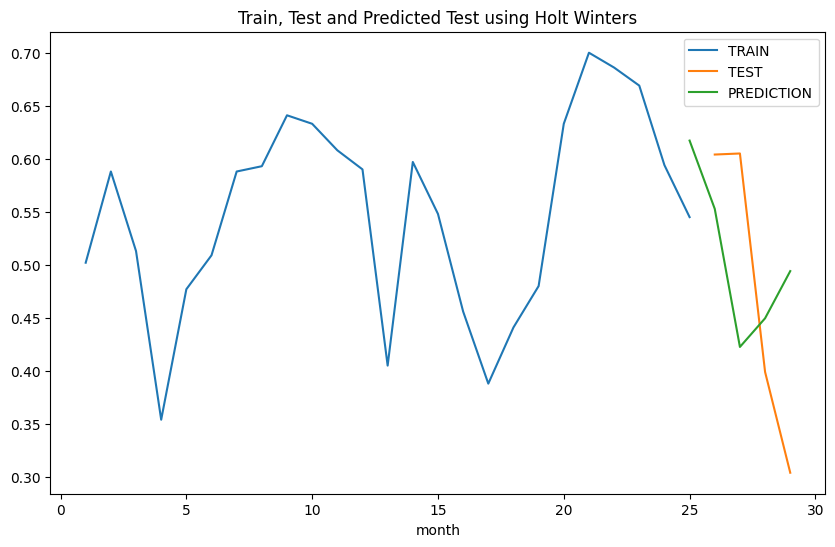

In [19]:
# Fit the model on the training data
fitted_model = ExponentialSmoothing(train_airline['CL_1000'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

# Forecast for the test period
test_predictions = fitted_model.forecast(5)

# Plot the results
plt.figure(figsize=(10, 6))
train_airline['CL_1000'].plot(legend=True, label='TRAIN')
test_airline['CL_1000'].plot(legend=True, label='TEST')
test_predictions.plot(legend=True, label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')
plt.show()
# Fit the model on the training data
fitted_model = ExponentialSmoothing(train_airline['AD_1000'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

# Forecast for the test period
test_predictions = fitted_model.forecast(5)

# Plot the results
plt.figure(figsize=(10, 6))
train_airline['AD_1000'].plot(legend=True, label='TRAIN')
test_airline['AD_1000'].plot(legend=True, label='TEST')
test_predictions.plot(legend=True, label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')
plt.show()

Testing 

C:\Users\vinus\AppData\Local\Temp\ipykernel_14484\403673186.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  airline = pd.read_excel('demand_month.xlsx', index_col='month', parse_dates=True)
c:\Anacondainstalledhere\envs\Ai\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Anacondainstalledhere\envs\Ai\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


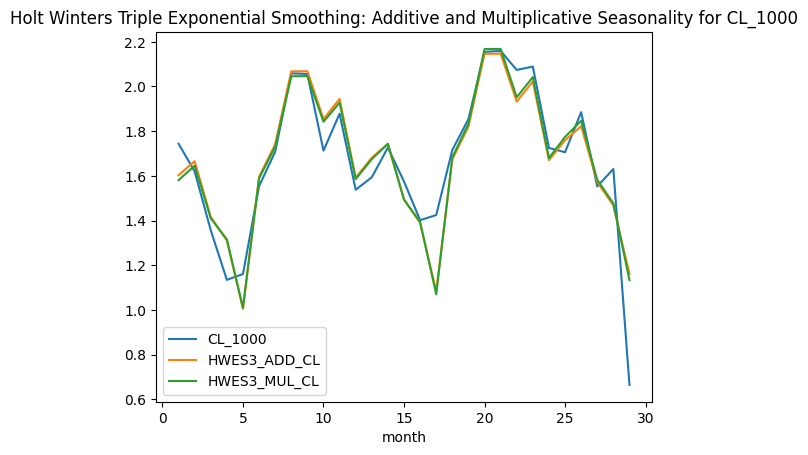

c:\Anacondainstalledhere\envs\Ai\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Anacondainstalledhere\envs\Ai\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


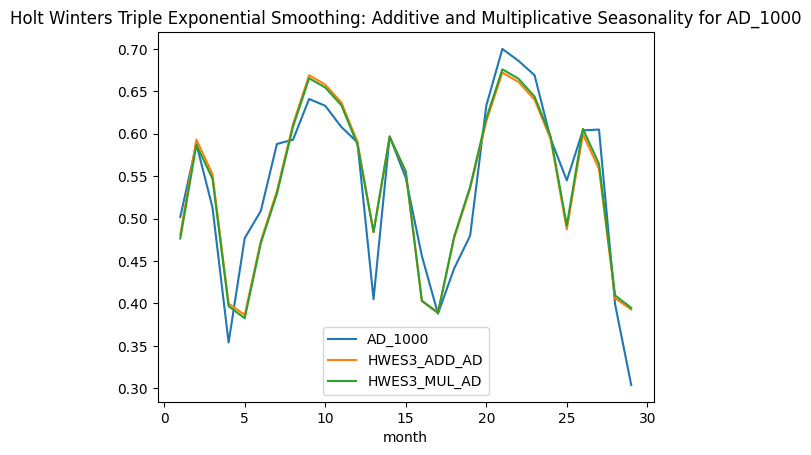

c:\Anacondainstalledhere\envs\Ai\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Anacondainstalledhere\envs\Ai\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Anacondainstalledhere\envs\Ai\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


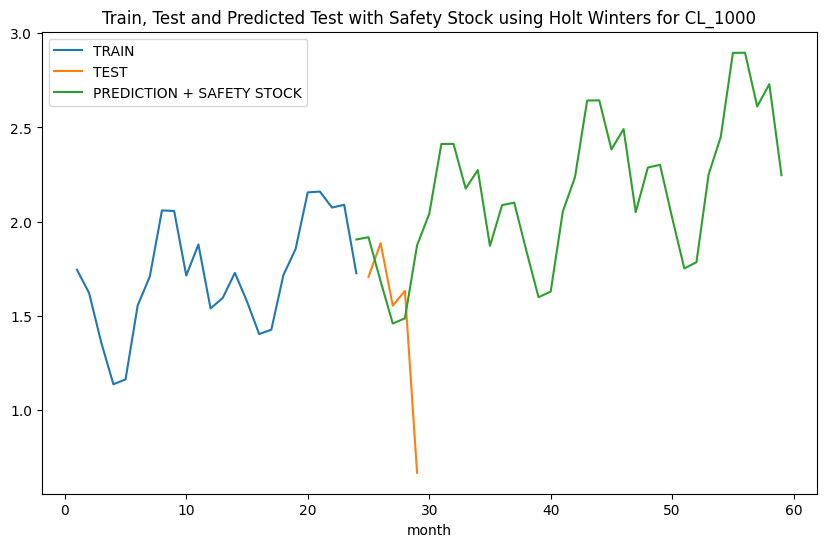

c:\Anacondainstalledhere\envs\Ai\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Anacondainstalledhere\envs\Ai\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Anacondainstalledhere\envs\Ai\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


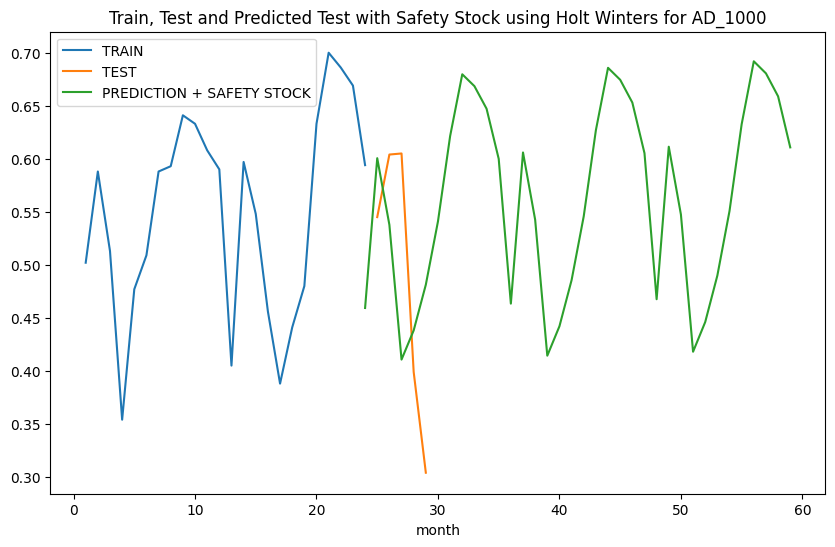

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the data
airline = pd.read_excel('demand_month.xlsx', index_col='month', parse_dates=True)
airline.index.freq = 'MS'

# Holt-Winters Triple Exponential Smoothing for CL_1000
airline['HWES3_ADD_CL'] = ExponentialSmoothing(
    airline['CL_1000'],
    trend='add',
    seasonal='add',
    seasonal_periods=12
).fit().fittedvalues

airline['HWES3_MUL_CL'] = ExponentialSmoothing(
    airline['CL_1000'],
    trend='mul',
    seasonal='mul',
    seasonal_periods=12
).fit().fittedvalues

# Plot the results for CL_1000
airline[['CL_1000', 'HWES3_ADD_CL', 'HWES3_MUL_CL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality for CL_1000')
plt.show()

# Holt-Winters Triple Exponential Smoothing for AD_1000
airline['HWES3_ADD_AD'] = ExponentialSmoothing(
    airline['AD_1000'],
    trend='add',
    seasonal='add',
    seasonal_periods=12
).fit().fittedvalues

airline['HWES3_MUL_AD'] = ExponentialSmoothing(
    airline['AD_1000'],
    trend='mul',
    seasonal='mul',
    seasonal_periods=12
).fit().fittedvalues

# Plot the results for AD_1000
airline[['AD_1000', 'HWES3_ADD_AD', 'HWES3_MUL_AD']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality for AD_1000')
plt.show()

# Split the data into train and test sets
train_airline = airline[:24]
test_airline = airline[24:]

# Fit the model and forecast for CL_1000
fitted_model_CL = ExponentialSmoothing(train_airline['CL_1000'], trend='mul', seasonal='mul', seasonal_periods=12).fit()
test_predictions_CL = fitted_model_CL.forecast(36) + (1.67 * 0)  # Add safety stock level

# Plot the results for CL_1000
plt.figure(figsize=(10, 6))
train_airline['CL_1000'].plot(legend=True, label='TRAIN')
test_airline['CL_1000'].plot(legend=True, label='TEST')
test_predictions_CL.plot(legend=True, label='PREDICTION + SAFETY STOCK')
plt.title('Train, Test and Predicted Test with Safety Stock using Holt Winters for CL_1000')
plt.show()

# Fit the model and forecast for AD_1000
fitted_model_AD = ExponentialSmoothing(train_airline['AD_1000'], trend='mul', seasonal='mul', seasonal_periods=12).fit()
test_predictions_AD = fitted_model_AD.forecast(36) + (0.539 * 0)  # Add safety stock level

# Plot the results for AD_1000
plt.figure(figsize=(10, 6))
train_airline['AD_1000'].plot(legend=True, label='TRAIN')
test_airline['AD_1000'].plot(legend=True, label='TEST')
test_predictions_AD.plot(legend=True, label='PREDICTION + SAFETY STOCK')
plt.title('Train, Test and Predicted Test with Safety Stock using Holt Winters for AD_1000')
plt.show()